In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
C96hAEL = '#F9F06C'
C120hAEL = '#EBA434'
Cupcrawling = '#414042'
CwhitePupa = '#003399'
C2hAPF = '#0080FF'
C4hAPF = '#33FFFF'
C6hAPF = '#71C382'
CecadGFPnbG4 = '#404040'
CecadGFPnbG4myoVI = '#0099CC'

##ffac06
colors = {'ecadGFPnbG4': CecadGFPnbG4,
 'ecadGFPnbG4myoVI': CecadGFPnbG4myoVI,
          '96hAEL': C96hAEL,
          '120hAEL':C120hAEL,
            'wL3': Cupcrawling,
            '0hAPF': CwhitePupa,
            '2hAPF': C2hAPF,
            '4hAPF': C4hAPF,
            '6hAPF': C6hAPF,
 'initial': 'gray',
#  'final' : '#99c5ff',
 'final':'#EBA434'
 }

color_dict = {'ecadGFPnbG4': CecadGFPnbG4,
 'ecadGFPnbG4myoVI': CecadGFPnbG4myoVI,
          '96hAEL': C96hAEL,
          '120hAEL':C120hAEL,
 'wL3': Cupcrawling,
 '0hAPF': CwhitePupa,
 '2hAPF': C2hAPF,
 '4hAPF': C4hAPF,
 '6hAPF': C6hAPF}

devstage_map = {
                "96hAEL":"96hAEL",
                "120hAEL":"120hAEL",
                "upcrawling":"wL3",
                "whitePupa":"0hAPF",
                "2hAPF":"2hAPF",
                "4hAPF":"4hAPF",
                "6hAPF":"6hAPF",
               }

rois = ['outDV', 'DV']
devstages = ["wL3","0hAPF","2hAPF","4hAPF","6hAPF"]


In [11]:
import os
import pwd
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib  as mpl
import pickle
import csv
from matplotlib import pyplot

In [12]:
sys.path

['/Users/krishna/PhD/WDeversion_theory/Simulations/notebooks',
 '/Users/krishna/.pyenv/versions/3.11.3/lib/python311.zip',
 '/Users/krishna/.pyenv/versions/3.11.3/lib/python3.11',
 '/Users/krishna/.pyenv/versions/3.11.3/lib/python3.11/lib-dynload',
 '',
 '/Users/krishna/PhD/WDeversion_theory/WD_env/lib/python3.11/site-packages',
 '/Users/krishna/PhD/WDeversion_theory/src']

In [29]:
#from wd_2D_functions import *
dataout = '../analysis/plots/'
os.makedirs(dataout,exist_ok=True)
import pickle

## WT results

### data

In [14]:
#plt.style.use('/Users/fuhrmann/mambaforge/pkgs/matplotlib-base-3.6.3-py39hb2f573b_0/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/seaborn-custom-whitegrid.mplstyle')
plt.style.use('/Users/krishna/PhD/WDeversion_theory/src/WDeversion_theory_methods/seaborn-custom-whitegrid.mplstyle')


In [15]:
exp_data_path = "/Users/krishna/PhD/WDeversion_theory/Experiments/data/segmented_curves/"
genotype = "ecadGFPnbG4"
#dataout = "plots/"

"""
df_mean = pd.read_csv(exp_data_path + crosssection + "_" + genotype + "_pouchShape_interpolated_mean.csv")
df = df_mean[df_mean['devstage'] == devstage]
linestyle = "-" if crosssection == "Across_DV" else "--"
max_pathlength_df = pd.read_csv(exp_data_path + "max_pathlength_df_"+genotype+".csv")
arclength_threshold = max_pathlength_df.query("devstage == @devstage and crosssection == @crosssection")["max_pathlength"].values[0]
df = df[np.abs(df["arclength"]) <= arclength_threshold]
"""

'\ndf_mean = pd.read_csv(exp_data_path + crosssection + "_" + genotype + "_pouchShape_interpolated_mean.csv")\ndf = df_mean[df_mean[\'devstage\'] == devstage]\nlinestyle = "-" if crosssection == "Across_DV" else "--"\nmax_pathlength_df = pd.read_csv(exp_data_path + "max_pathlength_df_"+genotype+".csv")\narclength_threshold = max_pathlength_df.query("devstage == @devstage and crosssection == @crosssection")["max_pathlength"].values[0]\ndf = df[np.abs(df["arclength"]) <= arclength_threshold]\n'

FileNotFoundError: [Errno 2] No such file or directory: '/Users/krishna/PhD/WDeversion_theory/Experiments/data/segmented_curves/max_pathlength_df_ecadGFPnbG4.csv'

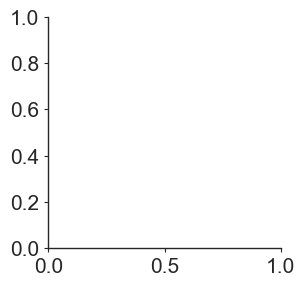

In [16]:
fig, ax = plt.subplots(figsize = (3,3))
for crosssection in ['Across_DV','Along_DV']:
    
    for devstage in ['wL3','4hAPF']:
    
        if crosssection == 'Along_DV': 
                style = '--' 
        else:
            style = '-'
        if devstage  == 'wL3':
            c = 'initial'
        elif devstage == '4hAPF':
            c = 'final'

        #toplot = df_mean_all_trunkated.loc[(df_mean_all_trunkated['devstage']==devstage)&(df_mean_all_trunkated['region']==region)]
        #read file
        df_mean = pd.read_csv(exp_data_path + crosssection + "_" + genotype + "_pouchShape_interpolated_mean.csv")
        df = df_mean[df_mean['devstage'] == devstage]
        max_pathlength_df = pd.read_csv(exp_data_path + "max_pathlength_df_"+genotype+".csv")
        arclength_threshold = max_pathlength_df.query("devstage == @devstage and crosssection == @crosssection")["max_pathlength"].values[0]
        df = df[np.abs(df["arclength"]) <= arclength_threshold]
        toplot = df.copy(deep = True)

        ax.plot(toplot['arclength'],toplot['curvature'], color = colors[devstage], linestyle = style,lw = 2)
        ax.fill_between(toplot['arclength'],y1 = toplot['curvature']-toplot['curvature_sd'],y2 = toplot['curvature']+toplot['curvature_sd'], color = 'grey', alpha = 0.2)
        

        ax.set_xlim(-120,120)
        ax.set_ylim(-0.005,0.045)
#         ax.set_yticks([])
#         ax.set_xticks([])

#         #adding scale bar
#         ax.plot([-100*7/8, -100*7/8+100],[-125*7/8,-125*7/8], lw = 2, color = 'black')      
#         ax.set_aspect('equal')
#plt.savefig(dataout + 'curvatureOverlay_wL3_0hAPF_trunkated.pdf', dpi = 600, bbox_inches = 'tight')

## Model results

In [42]:
dataout = dataout+"WT/"
os.makedirs(dataout,exist_ok=True)

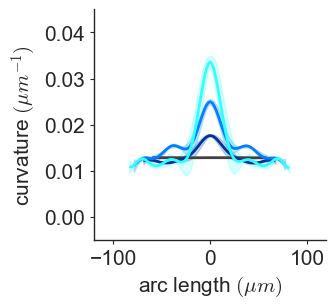

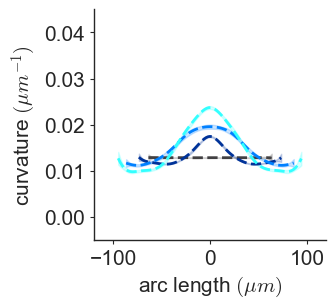

In [61]:
#### This is the import from only 5 simulations
#filepath = '/Users/fuhrmann/workspace/WingDiscEversion_theory/Simulations/different_conditions/Only_Area_Contribution/mesh_refine_factor_30/analysis/'
filepath = '/Users/krishna/PhD/WDeversion_theory/Simulations/data/WT/all/analysis/' #different_conditions/Only_Area_Contribution/mesh_refine_factor_30/analysis/'
file = filepath + 'crosssections_interpolated_mean.csv'
Area_Results = pd.read_csv(file)

Area_Results.loc[Area_Results['crosssection']=='Across_DV', 'region'] = 'acrossDV'
Area_Results.loc[Area_Results['crosssection']=='Along_DV', 'region'] = 'alongDV'
Area_Results = Area_Results.loc[Area_Results['thickness'] == 0.10]


for region in ['acrossDV','alongDV']:
    fig, ax = plt.subplots(figsize = (3,3))
    for i in range (0,4):
        devstage = ['wL3','0hAPF','2hAPF','4hAPF'][i]
        
        if region == 'alongDV': 
                style = '--' 
        else:
            style = '-'  

    
        toplot = Area_Results.loc[(Area_Results['devstage']==devstage)&(Area_Results['region']==region)]
        
        ax.fill_between(toplot['arclength'],y1 = toplot['curvature']-toplot['curvature_sd'],y2 = toplot['curvature']+toplot['curvature_sd'], color = colors[devstage], alpha = 0.2)

        ax.plot(toplot['arclength'],toplot['curvature'], color = colors[devstage], linestyle = style,lw = 2)

        ax.set_xlim(-120,120)
        ax.set_ylim(-0.005,0.045)
    ax.set_xlabel('arc length '+r'$(\mu m)$')
    ax.set_ylabel('curvature '+r'$(\mu m^{-1})$', rotation = 90)


#         ax.plot([-100*7/8, -100*7/8+100],[-125*7/8,-125*7/8], lw = 2, color = 'black')  
#         ax.set_aspect('equal')

    plt.savefig(dataout + 'Model_All_curvatureOverlay_eversion_' + region + '.pdf', dpi = 600, bbox_inches = 'tight')

### Area only model results

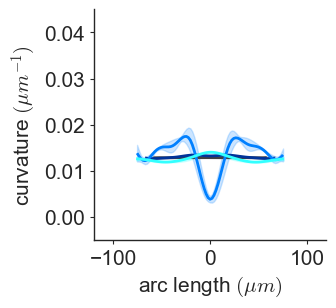

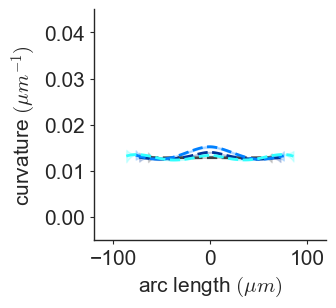

In [62]:
#### This is the import from only 5 simulations
#filepath = '/Users/fuhrmann/workspace/WingDiscEversion_theory/Simulations/different_conditions/Only_Area_Contribution/mesh_refine_factor_30/analysis/'
filepath = '/Users/krishna/PhD/WDeversion_theory/Simulations/data/WT/area/analysis/'

file = filepath + 'crosssections_interpolated_mean.csv'
Area_Results = pd.read_csv(file)

Area_Results.loc[Area_Results['crosssection']=='Across_DV', 'region'] = 'acrossDV'
Area_Results.loc[Area_Results['crosssection']=='Along_DV', 'region'] = 'alongDV'
Area_Results = Area_Results.loc[Area_Results['thickness'] == 0.10]


for region in ['acrossDV','alongDV']:
    fig, ax = plt.subplots(figsize = (3,3))
    for i in range (0,4):
        devstage = ['wL3','0hAPF','2hAPF','4hAPF'][i]
        
        if region == 'alongDV': 
                style = '--' 
        else:
            style = '-'  

    
        toplot = Area_Results.loc[(Area_Results['devstage']==devstage)&(Area_Results['region']==region)]
        
        ax.fill_between(toplot['arclength'],y1 = toplot['curvature']-toplot['curvature_sd'],y2 = toplot['curvature']+toplot['curvature_sd'], color = colors[devstage], alpha = 0.2)

        ax.plot(toplot['arclength'],toplot['curvature'], color = colors[devstage], linestyle = style,lw = 2)

        ax.set_xlim(-120,120)
        ax.set_ylim(-0.005,0.045)
    ax.set_xlabel('arc length '+r'$(\mu m)$')
    ax.set_ylabel('curvature '+r'$(\mu m^{-1})$', rotation = 90)


#         ax.plot([-100*7/8, -100*7/8+100],[-125*7/8,-125*7/8], lw = 2, color = 'black')  
#         ax.set_aspect('equal')

    plt.savefig(dataout + 'Model_Area_curvatureOverlay_eversion_' + region + '.pdf', dpi = 600, bbox_inches = 'tight')

### elongation results

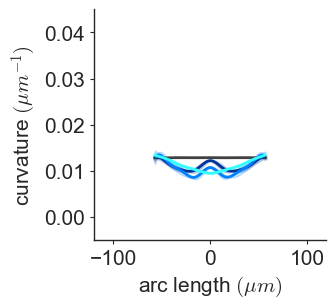

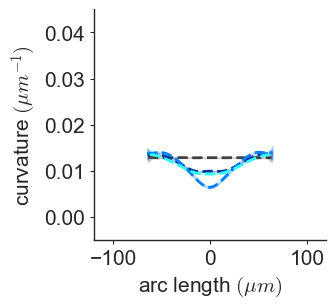

In [63]:
#### This is the import from only 5 simulations
#filepath = '/Users/fuhrmann/workspace/WingDiscEversion_theory/Simulations/different_conditions/Only_Elongation_Contribution/mesh_refine_factor_30/analysis/'
#filepath = '/Users/krishna/PhD/WingDiscEversion_theory/Simulations/different_conditions/Only_Area_Contribution/mesh_refine_factor_30/analysis/'
filepath = '/Users/krishna/PhD/WDeversion_theory/Simulations/data/WT/elongation/analysis/'
file = filepath + 'crosssections_interpolated_mean.csv'
Model_Results = pd.read_csv(file)

Model_Results.loc[Model_Results['crosssection']=='Across_DV', 'region'] = 'acrossDV'
Model_Results.loc[Model_Results['crosssection']=='Along_DV', 'region'] = 'alongDV'
Model_Results = Model_Results.loc[Model_Results['thickness'] == 0.10]


for region in ['acrossDV','alongDV']:
    fig, ax = plt.subplots(figsize = (3,3))
    for i in range (0,4):
        devstage = ['wL3','0hAPF','2hAPF','4hAPF'][i]
        
        if region == 'alongDV': 
                style = '--' 
        else:
            style = '-'  

    
        toplot = Model_Results.loc[(Model_Results['devstage']==devstage)&(Model_Results['region']==region)]
        
        ax.fill_between(toplot['arclength'],y1 = toplot['curvature']-toplot['curvature_sd'],y2 = toplot['curvature']+toplot['curvature_sd'], color = colors[devstage], alpha = 0.2)

        ax.plot(toplot['arclength'],toplot['curvature'], color = colors[devstage], linestyle = style,lw = 2)

        ax.set_xlim(-120,120)
        ax.set_ylim(-0.005,0.045)
    ax.set_xlabel('arc length '+r'$(\mu m)$')
    ax.set_ylabel('curvature '+r'$(\mu m^{-1})$', rotation = 90)
        

#         ax.plot([-100*7/8, -100*7/8+100],[-125*7/8,-125*7/8], lw = 2, color = 'black')  
#         ax.set_aspect('equal')
    plt.savefig(dataout + 'Model_Elongation_curvatureOverlay_eversion_' + region + '.pdf', dpi = 600, bbox_inches = 'tight')

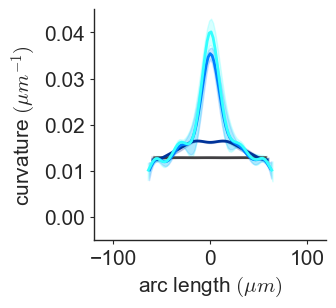

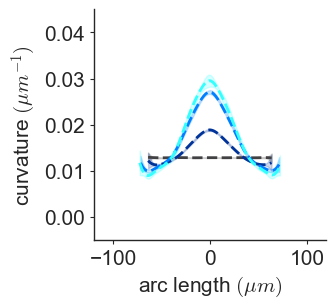

In [64]:
#### This is the import from only 5 simulations
#filepath = '/Users/fuhrmann/workspace/WingDiscEversion_theory/Simulations/different_conditions/Only_Elongation_Contribution/mesh_refine_factor_30/analysis/'
#filepath = '/Users/krishna/PhD/WingDiscEversion_theory/Simulations/different_conditions/Only_Area_Contribution/mesh_refine_factor_30/analysis/'
filepath = '/Users/krishna/PhD/WDeversion_theory/Simulations/data/WT/rearrangement/analysis/'
file = filepath + 'crosssections_interpolated_mean.csv'
Model_Results = pd.read_csv(file)

Model_Results.loc[Model_Results['crosssection']=='Across_DV', 'region'] = 'acrossDV'
Model_Results.loc[Model_Results['crosssection']=='Along_DV', 'region'] = 'alongDV'
Model_Results = Model_Results.loc[Model_Results['thickness'] == 0.10]


for region in ['acrossDV','alongDV']:
    fig, ax = plt.subplots(figsize = (3,3))
    for i in range (0,4):
        devstage = ['wL3','0hAPF','2hAPF','4hAPF'][i]
        
        if region == 'alongDV': 
                style = '--' 
        else:
            style = '-'  

    
        toplot = Model_Results.loc[(Model_Results['devstage']==devstage)&(Model_Results['region']==region)]
        #toplot['curvature'] = toplot['curvature']
        
        ax.fill_between(toplot['arclength'],y1 = toplot['curvature']-toplot['curvature_sd'],y2 = toplot['curvature']+toplot['curvature_sd'], color = colors[devstage], alpha = 0.2)

        ax.plot(toplot['arclength'],toplot['curvature'], color = colors[devstage], linestyle = style,lw = 2)

        ax.set_xlim(-120,120)
        ax.set_ylim(-0.005,0.045)
    ax.set_xlabel('arc length '+r'$(\mu m)$')
    ax.set_ylabel('curvature '+r'$(\mu m^{-1})$', rotation = 90)


#         ax.plot([-100*7/8, -100*7/8+100],[-125*7/8,-125*7/8], lw = 2, color = 'black')  
#         ax.set_aspect('equal')
    plt.savefig(dataout + 'Model_Rearrangement_curvatureOverlay_eversion_' + region + '.pdf', dpi = 600, bbox_inches = 'tight')

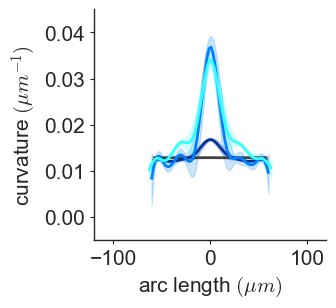

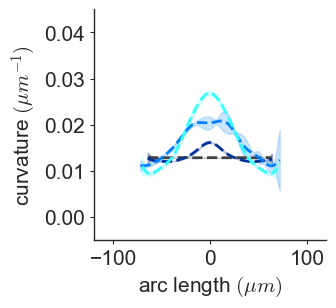

In [65]:
#### This is the import from only 5 simulations
#filepath = '/Users/fuhrmann/workspace/WingDiscEversion_theory/Simulations/different_conditions/Only_Elongation_Contribution/mesh_refine_factor_30/analysis/'
#filepath = '/Users/krishna/PhD/WingDiscEversion_theory/Simulations/different_conditions/Only_Area_Contribution/mesh_refine_factor_30/analysis/'
filepath = '/Users/krishna/PhD/WDeversion_theory/Simulations/data/WT/elongation_rearrangement/analysis/'
file = filepath + 'crosssections_interpolated_mean.csv'
Model_Results = pd.read_csv(file)

Model_Results.loc[Model_Results['crosssection']=='Across_DV', 'region'] = 'acrossDV'
Model_Results.loc[Model_Results['crosssection']=='Along_DV', 'region'] = 'alongDV'
Model_Results = Model_Results.loc[Model_Results['thickness'] == 0.10]


for region in ['acrossDV','alongDV']:
    fig, ax = plt.subplots(figsize = (3,3))
    for i in range (0,4):
        devstage = ['wL3','0hAPF','2hAPF','4hAPF'][i]
        
        if region == 'alongDV': 
                style = '--' 
        else:
            style = '-'  

    
        toplot = Model_Results.loc[(Model_Results['devstage']==devstage)&(Model_Results['region']==region)]
        #toplot['curvature'] = toplot['curvature']
        
        ax.fill_between(toplot['arclength'],y1 = toplot['curvature']-toplot['curvature_sd'],y2 = toplot['curvature']+toplot['curvature_sd'], color = colors[devstage], alpha = 0.2)

        ax.plot(toplot['arclength'],toplot['curvature'], color = colors[devstage], linestyle = style,lw = 2)

        ax.set_xlim(-120,120)
        ax.set_ylim(-0.005,0.045)
    ax.set_xlabel('arc length '+r'$(\mu m)$')
    ax.set_ylabel('curvature '+r'$(\mu m^{-1})$', rotation = 90)


#         ax.plot([-100*7/8, -100*7/8+100],[-125*7/8,-125*7/8], lw = 2, color = 'black')  
#         ax.set_aspect('equal')
    plt.savefig(dataout + 'Model_Elongation_Rearrangement_curvatureOverlay_eversion_' + region + '.pdf', dpi = 600, bbox_inches = 'tight')

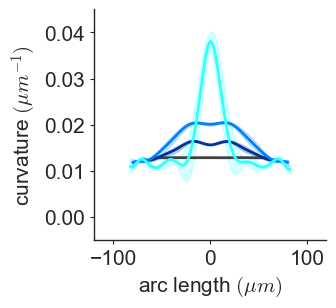

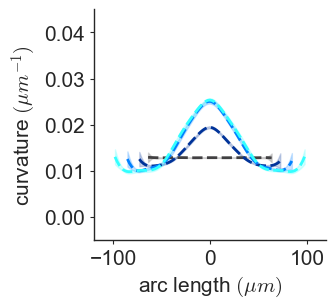

In [66]:
#### This is the import from only 5 simulations
#filepath = '/Users/fuhrmann/workspace/WingDiscEversion_theory/Simulations/different_conditions/Only_Elongation_Contribution/mesh_refine_factor_30/analysis/'
#filepath = '/Users/krishna/PhD/WingDiscEversion_theory/Simulations/different_conditions/Only_Area_Contribution/mesh_refine_factor_30/analysis/'
filepath = '/Users/krishna/PhD/WDeversion_theory/Simulations/data/WT/area_rearrangement/analysis/'
file = filepath + 'crosssections_interpolated_mean.csv'
Model_Results = pd.read_csv(file)

Model_Results.loc[Model_Results['crosssection']=='Across_DV', 'region'] = 'acrossDV'
Model_Results.loc[Model_Results['crosssection']=='Along_DV', 'region'] = 'alongDV'
Model_Results = Model_Results.loc[Model_Results['thickness'] == 0.10]


for region in ['acrossDV','alongDV']:
    fig, ax = plt.subplots(figsize = (3,3))
    for i in range (0,4):
        devstage = ['wL3','0hAPF','2hAPF','4hAPF'][i]
        
        if region == 'alongDV': 
                style = '--' 
        else:
            style = '-'  

    
        toplot = Model_Results.loc[(Model_Results['devstage']==devstage)&(Model_Results['region']==region)]
        #toplot['curvature'] = toplot['curvature']
        
        ax.fill_between(toplot['arclength'],y1 = toplot['curvature']-toplot['curvature_sd'],y2 = toplot['curvature']+toplot['curvature_sd'], color = colors[devstage], alpha = 0.2)

        ax.plot(toplot['arclength'],toplot['curvature'], color = colors[devstage], linestyle = style,lw = 2)

        ax.set_xlim(-120,120)
        ax.set_ylim(-0.005,0.045)
    ax.set_xlabel('arc length '+r'$(\mu m)$')
    ax.set_ylabel('curvature '+r'$(\mu m^{-1})$', rotation = 90)


#         ax.plot([-100*7/8, -100*7/8+100],[-125*7/8,-125*7/8], lw = 2, color = 'black')  
#         ax.set_aspect('equal')
    plt.savefig(dataout + 'Model_Area_Rearrangement_curvatureOverlay_eversion_' + region + '.pdf', dpi = 600, bbox_inches = 'tight')

## Myosin results

In [67]:
dataout = dataout.replace("WT", "Myo")
os.makedirs(dataout,exist_ok=True)

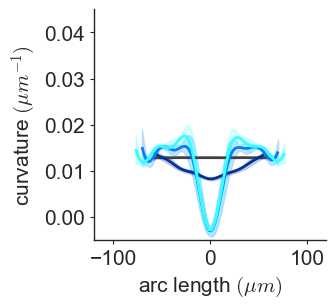

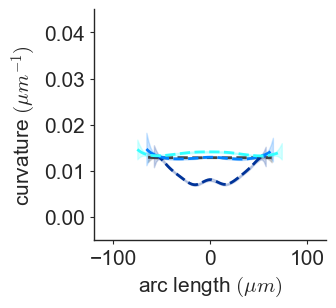

In [68]:
#### This is the import from only 5 simulations
#filepath = '/Users/fuhrmann/workspace/WingDiscEversion_theory/Simulations/different_conditions/Only_Area_Contribution/mesh_refine_factor_30/analysis/'
filepath = '/Users/krishna/PhD/WDeversion_theory/Simulations/data/Myo/all/analysis/' #different_conditions/Only_Area_Contribution/mesh_refine_factor_30/analysis/'
file = filepath + 'crosssections_interpolated_mean.csv'
Area_Results = pd.read_csv(file)

Area_Results.loc[Area_Results['crosssection']=='Across_DV', 'region'] = 'acrossDV'
Area_Results.loc[Area_Results['crosssection']=='Along_DV', 'region'] = 'alongDV'
Area_Results = Area_Results.loc[Area_Results['thickness'] == 0.10]


for region in ['acrossDV','alongDV']:
    fig, ax = plt.subplots(figsize = (3,3))
    for i in range (0,4):
        devstage = ['wL3','0hAPF','2hAPF','4hAPF'][i]
        
        if region == 'alongDV': 
                style = '--' 
        else:
            style = '-'  

    
        toplot = Area_Results.loc[(Area_Results['devstage']==devstage)&(Area_Results['region']==region)]
        
        ax.fill_between(toplot['arclength'],y1 = toplot['curvature']-toplot['curvature_sd'],y2 = toplot['curvature']+toplot['curvature_sd'], color = colors[devstage], alpha = 0.2)

        ax.plot(toplot['arclength'],toplot['curvature'], color = colors[devstage], linestyle = style,lw = 2)

        ax.set_xlim(-120,120)
        ax.set_ylim(-0.005,0.045)
    ax.set_xlabel('arc length '+r'$(\mu m)$')
    ax.set_ylabel('curvature '+r'$(\mu m^{-1})$', rotation = 90)

#         ax.plot([-100*7/8, -100*7/8+100],[-125*7/8,-125*7/8], lw = 2, color = 'black')  
#         ax.set_aspect('equal')

    plt.savefig(dataout + 'Model_All_curvatureOverlay_eversion_' + region + '.pdf', dpi = 600, bbox_inches = 'tight')

### Area only model results

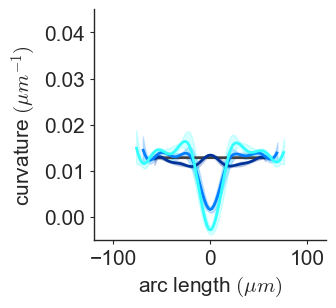

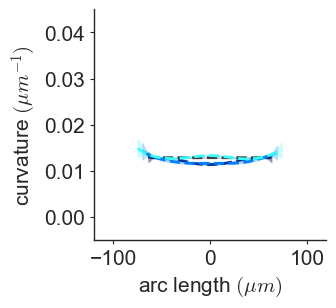

In [69]:
#### This is the import from only 5 simulations
#filepath = '/Users/fuhrmann/workspace/WingDiscEversion_theory/Simulations/different_conditions/Only_Area_Contribution/mesh_refine_factor_30/analysis/'
filepath = '/Users/krishna/PhD/WDeversion_theory/Simulations/data/Myo/area/analysis/'

file = filepath + 'crosssections_interpolated_mean.csv'
Area_Results = pd.read_csv(file)

Area_Results.loc[Area_Results['crosssection']=='Across_DV', 'region'] = 'acrossDV'
Area_Results.loc[Area_Results['crosssection']=='Along_DV', 'region'] = 'alongDV'
Area_Results = Area_Results.loc[Area_Results['thickness'] == 0.10]


for region in ['acrossDV','alongDV']:
    fig, ax = plt.subplots(figsize = (3,3))
    for i in range (0,4):
        devstage = ['wL3','0hAPF','2hAPF','4hAPF'][i]
        
        if region == 'alongDV': 
                style = '--' 
        else:
            style = '-'  

    
        toplot = Area_Results.loc[(Area_Results['devstage']==devstage)&(Area_Results['region']==region)]
        
        ax.fill_between(toplot['arclength'],y1 = toplot['curvature']-toplot['curvature_sd'],y2 = toplot['curvature']+toplot['curvature_sd'], color = colors[devstage], alpha = 0.2)

        ax.plot(toplot['arclength'],toplot['curvature'], color = colors[devstage], linestyle = style,lw = 2)

        ax.set_xlim(-120,120)
        ax.set_ylim(-0.005,0.045)
    ax.set_xlabel('arc length '+r'$(\mu m)$')
    ax.set_ylabel('curvature '+r'$(\mu m^{-1})$', rotation = 90)


#         ax.plot([-100*7/8, -100*7/8+100],[-125*7/8,-125*7/8], lw = 2, color = 'black')  
#         ax.set_aspect('equal')

    plt.savefig(dataout + 'Model_Area_curvatureOverlay_eversion_' + region + '.pdf', dpi = 600, bbox_inches = 'tight')

### elongation results

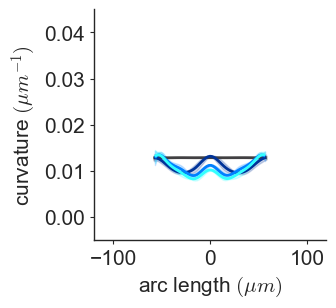

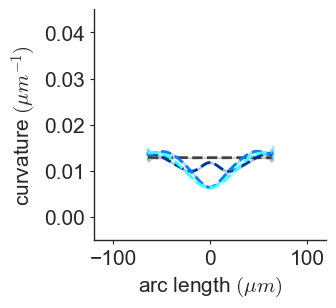

In [70]:
#### This is the import from only 5 simulations
#filepath = '/Users/fuhrmann/workspace/WingDiscEversion_theory/Simulations/different_conditions/Only_Elongation_Contribution/mesh_refine_factor_30/analysis/'
#filepath = '/Users/krishna/PhD/WingDiscEversion_theory/Simulations/different_conditions/Only_Area_Contribution/mesh_refine_factor_30/analysis/'
filepath = '/Users/krishna/PhD/WDeversion_theory/Simulations/data/Myo/elongation/analysis/'
file = filepath + 'crosssections_interpolated_mean.csv'
Model_Results = pd.read_csv(file)

Model_Results.loc[Model_Results['crosssection']=='Across_DV', 'region'] = 'acrossDV'
Model_Results.loc[Model_Results['crosssection']=='Along_DV', 'region'] = 'alongDV'
Model_Results = Model_Results.loc[Model_Results['thickness'] == 0.10]


for region in ['acrossDV','alongDV']:
    fig, ax = plt.subplots(figsize = (3,3))
    for i in range (0,4):
        devstage = ['wL3','0hAPF','2hAPF','4hAPF'][i]
        
        if region == 'alongDV': 
                style = '--' 
        else:
            style = '-'  

    
        toplot = Model_Results.loc[(Model_Results['devstage']==devstage)&(Model_Results['region']==region)]
        
        ax.fill_between(toplot['arclength'],y1 = toplot['curvature']-toplot['curvature_sd'],y2 = toplot['curvature']+toplot['curvature_sd'], color = colors[devstage], alpha = 0.2)

        ax.plot(toplot['arclength'],toplot['curvature'], color = colors[devstage], linestyle = style,lw = 2)

        ax.set_xlim(-120,120)
        ax.set_ylim(-0.005,0.045)
    ax.set_xlabel('arc length '+r'$(\mu m)$')
    ax.set_ylabel('curvature '+r'$(\mu m^{-1})$', rotation = 90)


#         ax.plot([-100*7/8, -100*7/8+100],[-125*7/8,-125*7/8], lw = 2, color = 'black')  
#         ax.set_aspect('equal')
    plt.savefig(dataout + 'Model_Elongation_curvatureOverlay_eversion_' + region + '.pdf', dpi = 600, bbox_inches = 'tight')

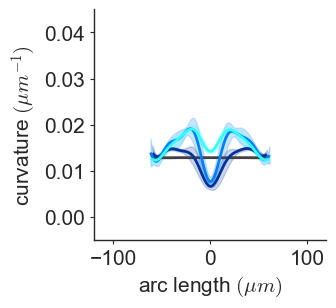

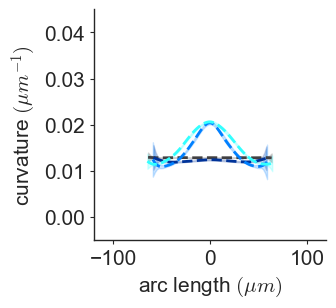

In [71]:
#### This is the import from only 5 simulations
#filepath = '/Users/fuhrmann/workspace/WingDiscEversion_theory/Simulations/different_conditions/Only_Elongation_Contribution/mesh_refine_factor_30/analysis/'
#filepath = '/Users/krishna/PhD/WingDiscEversion_theory/Simulations/different_conditions/Only_Area_Contribution/mesh_refine_factor_30/analysis/'
filepath = '/Users/krishna/PhD/WDeversion_theory/Simulations/data/Myo/rearrangement/analysis/'
file = filepath + 'crosssections_interpolated_mean.csv'
Model_Results = pd.read_csv(file)

Model_Results.loc[Model_Results['crosssection']=='Across_DV', 'region'] = 'acrossDV'
Model_Results.loc[Model_Results['crosssection']=='Along_DV', 'region'] = 'alongDV'
Model_Results = Model_Results.loc[Model_Results['thickness'] == 0.10]


for region in ['acrossDV','alongDV']:
    fig, ax = plt.subplots(figsize = (3,3))
    for i in range (0,4):
        devstage = ['wL3','0hAPF','2hAPF','4hAPF'][i]
        
        if region == 'alongDV': 
                style = '--' 
        else:
            style = '-'  

    
        toplot = Model_Results.loc[(Model_Results['devstage']==devstage)&(Model_Results['region']==region)]
        #toplot['curvature'] = toplot['curvature']
        
        ax.fill_between(toplot['arclength'],y1 = toplot['curvature']-toplot['curvature_sd'],y2 = toplot['curvature']+toplot['curvature_sd'], color = colors[devstage], alpha = 0.2)

        ax.plot(toplot['arclength'],toplot['curvature'], color = colors[devstage], linestyle = style,lw = 2)

        ax.set_xlim(-120,120)
        ax.set_ylim(-0.005,0.045)
    ax.set_xlabel('arc length '+r'$(\mu m)$')
    ax.set_ylabel('curvature '+r'$(\mu m^{-1})$', rotation = 90)


#         ax.plot([-100*7/8, -100*7/8+100],[-125*7/8,-125*7/8], lw = 2, color = 'black')  
#         ax.set_aspect('equal')
    plt.savefig(dataout + 'Model_Rearrangement_curvatureOverlay_eversion_' + region + '.pdf', dpi = 600, bbox_inches = 'tight')

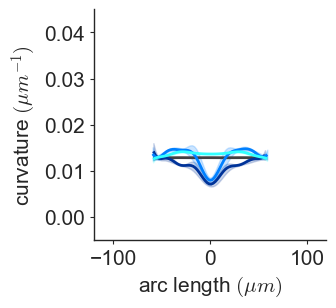

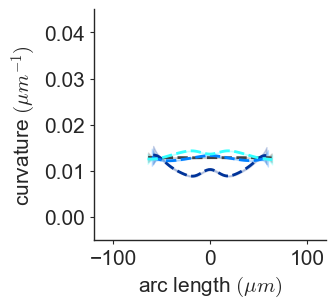

In [72]:
#### This is the import from only 5 simulations
#filepath = '/Users/fuhrmann/workspace/WingDiscEversion_theory/Simulations/different_conditions/Only_Elongation_Contribution/mesh_refine_factor_30/analysis/'
#filepath = '/Users/krishna/PhD/WingDiscEversion_theory/Simulations/different_conditions/Only_Area_Contribution/mesh_refine_factor_30/analysis/'
filepath = '/Users/krishna/PhD/WDeversion_theory/Simulations/data/Myo/elongation_rearrangement/analysis/'
file = filepath + 'crosssections_interpolated_mean.csv'
Model_Results = pd.read_csv(file)

Model_Results.loc[Model_Results['crosssection']=='Across_DV', 'region'] = 'acrossDV'
Model_Results.loc[Model_Results['crosssection']=='Along_DV', 'region'] = 'alongDV'
Model_Results = Model_Results.loc[Model_Results['thickness'] == 0.10]


for region in ['acrossDV','alongDV']:
    fig, ax = plt.subplots(figsize = (3,3))
    for i in range (0,4):
        devstage = ['wL3','0hAPF','2hAPF','4hAPF'][i]
        
        if region == 'alongDV': 
                style = '--' 
        else:
            style = '-'  

    
        toplot = Model_Results.loc[(Model_Results['devstage']==devstage)&(Model_Results['region']==region)]
        #toplot['curvature'] = toplot['curvature']
        
        ax.fill_between(toplot['arclength'],y1 = toplot['curvature']-toplot['curvature_sd'],y2 = toplot['curvature']+toplot['curvature_sd'], color = colors[devstage], alpha = 0.2)

        ax.plot(toplot['arclength'],toplot['curvature'], color = colors[devstage], linestyle = style,lw = 2)

        ax.set_xlim(-120,120)
        ax.set_ylim(-0.005,0.045)
    ax.set_xlabel('arc length '+r'$(\mu m)$')
    ax.set_ylabel('curvature '+r'$(\mu m^{-1})$', rotation = 90)


#         ax.plot([-100*7/8, -100*7/8+100],[-125*7/8,-125*7/8], lw = 2, color = 'black')  
#         ax.set_aspect('equal')
    plt.savefig(dataout + 'Model_Elongation_Rearrangement_curvatureOverlay_eversion_' + region + '.pdf', dpi = 600, bbox_inches = 'tight')

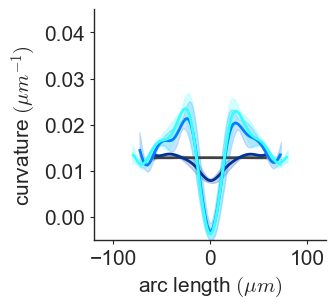

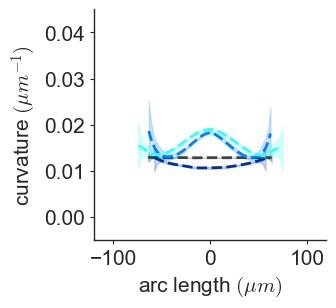

In [73]:
#### This is the import from only 5 simulations
#filepath = '/Users/fuhrmann/workspace/WingDiscEversion_theory/Simulations/different_conditions/Only_Elongation_Contribution/mesh_refine_factor_30/analysis/'
#filepath = '/Users/krishna/PhD/WingDiscEversion_theory/Simulations/different_conditions/Only_Area_Contribution/mesh_refine_factor_30/analysis/'
filepath = '/Users/krishna/PhD/WDeversion_theory/Simulations/data/Myo/area_rearrangement/analysis/'
file = filepath + 'crosssections_interpolated_mean.csv'
Model_Results = pd.read_csv(file)

Model_Results.loc[Model_Results['crosssection']=='Across_DV', 'region'] = 'acrossDV'
Model_Results.loc[Model_Results['crosssection']=='Along_DV', 'region'] = 'alongDV'
Model_Results = Model_Results.loc[Model_Results['thickness'] == 0.10]


for region in ['acrossDV','alongDV']:
    fig, ax = plt.subplots(figsize = (3,3))
    for i in range (0,4):
        devstage = ['wL3','0hAPF','2hAPF','4hAPF'][i]
        
        if region == 'alongDV': 
                style = '--' 
        else:
            style = '-'  

    
        toplot = Model_Results.loc[(Model_Results['devstage']==devstage)&(Model_Results['region']==region)]
        #toplot['curvature'] = toplot['curvature']
        
        ax.fill_between(toplot['arclength'],y1 = toplot['curvature']-toplot['curvature_sd'],y2 = toplot['curvature']+toplot['curvature_sd'], color = colors[devstage], alpha = 0.2)

        ax.plot(toplot['arclength'],toplot['curvature'], color = colors[devstage], linestyle = style,lw = 2)

        ax.set_xlim(-120,120)
        ax.set_ylim(-0.005,0.045)
    ax.set_xlabel('arc length '+r'$(\mu m)$')
    ax.set_ylabel('curvature '+r'$(\mu m^{-1})$', rotation = 90)


#         ax.plot([-100*7/8, -100*7/8+100],[-125*7/8,-125*7/8], lw = 2, color = 'black')  
#         ax.set_aspect('equal')
    plt.savefig(dataout + 'Model_Area_Rearrangement_curvatureOverlay_eversion_' + region + '.pdf', dpi = 600, bbox_inches = 'tight')

NameError: name 'df_mean_all_trunkated' is not defined

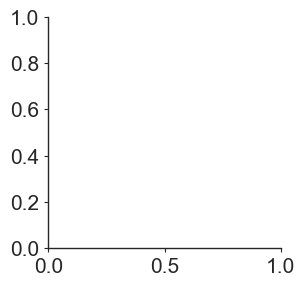

In [74]:
for region in ['acrossDV','alongDV']:
    fig, ax = plt.subplots(figsize = (3,3))
    for devstage in ['wL3','0hAPF','2hAPF','4hAPF']:
   
        if region == 'alongDV': 
                style = '--' 
        else:
            style = '-'
        # if devstage  == 'wL3':
        #     c = 'initial'
        # elif devstage == '4hAPF':
        #     c = 'final'

        c = 'final'
        # toplot = ModelAllBehaviours.loc[( ModelAllBehaviours['devstage']==devstage)&( ModelAllBehaviours['region']==region)]
        # ax.plot(toplot['arclength'],toplot['curvature'], color = colors[c], linestyle = style,lw = 2)

        toplot = df_mean_all_trunkated.loc[(df_mean_all_trunkated['devstage']==devstage)&(df_mean_all_trunkated['region']==region)]
        ax.plot(toplot['arclength'],toplot['curvature_mean'], color = colors[devstage], linestyle = style,lw = 2)
        ax.fill_between(toplot['arclength'],y1 = toplot['curvature_mean']-toplot['curvature_std'],y2 = toplot['curvature_mean']+toplot['curvature_std'], color = colors[devstage], alpha = 0.2)
        

        ax.set_xlim(-120,120)
        ax.set_ylim(-0.005,0.045)


    plt.savefig(dataout + 'Data_curvatureOverlay_' + region + '.pdf', dpi = 600, bbox_inches = 'tight')

In [ ]:
for devstage in ['wL3','0hAPF','2hAPF','4hAPF']:
    fig, ax = plt.subplots(figsize = (3,3))
    for region in ['acrossDV','alongDV']:
        
   
        if region == 'alongDV': 
                style = '--' 
        else:
            style = '-'
        # if devstage  == 'wL3':
        #     c = 'initial'
        # elif devstage == '4hAPF':
        #     c = 'final'

        c = 'final'
        toplot = ModelAllBehaviours.loc[( ModelAllBehaviours['devstage']==devstage)&( ModelAllBehaviours['region']==region)]
        ax.plot(toplot['arclength'],toplot['curvature'], color = colors[c], linestyle = style,lw = 2)

        toplot = df_mean_all_trunkated.loc[(df_mean_all_trunkated['devstage']==devstage)&(df_mean_all_trunkated['region']==region)]
        ax.plot(toplot['arclength'],toplot['curvature_mean'], color = colors[devstage], linestyle = style,lw = 2)
        ax.fill_between(toplot['arclength'],y1 = toplot['curvature_mean']-toplot['curvature_std'],y2 = toplot['curvature_mean']+toplot['curvature_std'], color = 'grey', alpha = 0.2)
        

        ax.set_xlim(-120,120)
        ax.set_ylim(-0.005,0.045)


    plt.savefig(dataout + 'Model_vs_Data_allWT_curvatureOverlay_' + devstage + '.pdf', dpi = 600, bbox_inches = 'tight')

In [ ]:
for devstage in ['wL3','0hAPF','2hAPF','4hAPF']:
    fig, ax = plt.subplots(figsize = (3,3))
    for region in ['acrossDV','alongDV']:
    
        if region == 'alongDV': 
                style = '--' 
        else:
            style = '-'

        c = 'final'


        toplot = df_mean_all_trunkated.loc[(df_mean_all_trunkated['devstage']==devstage)&(df_mean_all_trunkated['region']==region)]
        ax.plot(toplot['x_mean'],toplot['y_mean'], color = colors[devstage], linestyle = style,lw = 2)
        ax.fill_between(toplot['x_mean'],y1 = toplot['y_mean']-toplot['y_std'],y2 = toplot['y_mean']+toplot['y_std'], color = 'grey', alpha = 0.2)
        ax.fill_betweenx(y = toplot['y_mean'],x1 = toplot['x_mean']-toplot['x_std'],x2 = toplot['x_mean']+toplot['x_std'], color = 'grey', alpha = 0.2)

        toplot =  ModelAllBehaviours.loc[( ModelAllBehaviours['devstage']==devstage)&( ModelAllBehaviours['region']==region)]
        ax.plot(toplot['x'],toplot['y'], color = colors[c], linestyle = style,lw = 2)

        ax.set_xlim(-100,100)
        ax.set_ylim(-125,75)
        ax.set_yticks([])
        ax.set_xticks([])
        ax.spines['top'].set_visible(True)
        ax.spines['right'].set_visible(True)
        ax.plot([-100*7/8, -100*7/8+100],[-125*7/8,-125*7/8], lw = 2, color = 'black')  

        ax.set_aspect('equal')

    plt.savefig(dataout + 'Model_vs_Data_allWT_shapeOverlay_' + devstage + '.pdf', dpi = 600, bbox_inches = 'tight')

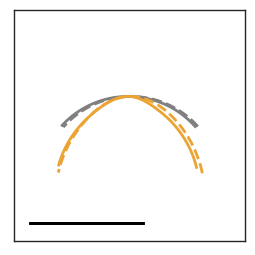

In [63]:
plt.style.use('/Users/fuhrmann/mambaforge/pkgs/matplotlib-base-3.6.3-py39hb2f573b_0/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/seaborn-custom-whitegrid-allaxspines.mplstyle')

fig, ax = plt.subplots(figsize = (3,3))

for devstage in ['wL3','4hAPF']:
    
    for region in ['acrossDV','alongDV']:
    
        if region == 'alongDV': 
                style = '--' 
        else:
            style = '-'

            
        if devstage  == 'wL3':
            c = 'initial'
        elif devstage == '4hAPF':
            c = 'final'


        # toplot = df_mean_all_trunkated.loc[(df_mean_all_trunkated['devstage']==devstage)&(df_mean_all_trunkated['region']==region)]
        # ax.plot(toplot['x_mean'],toplot['y_mean'], color = colors[devstage], linestyle = style,lw = 2)
        # ax.fill_between(toplot['x_mean'],y1 = toplot['y_mean']-toplot['y_std'],y2 = toplot['y_mean']+toplot['y_std'], color = 'grey', alpha = 0.2)
        # ax.fill_betweenx(y = toplot['y_mean'],x1 = toplot['x_mean']-toplot['x_std'],x2 = toplot['x_mean']+toplot['x_std'], color = 'grey', alpha = 0.2)

        toplot =  ModelAllBehaviours.loc[( ModelAllBehaviours['devstage']==devstage)&( ModelAllBehaviours['region']==region)]
        ax.plot(toplot['x'],toplot['y'], color = colors[c], linestyle = style,lw = 2)

        ax.set_xlim(-100,100)
        ax.set_ylim(-125,75)
        ax.set_yticks([])
        ax.set_xticks([])
        ax.spines['top'].set_visible(True)
        ax.spines['right'].set_visible(True)
        ax.plot([-100*7/8, -100*7/8+100],[-125*7/8,-125*7/8], lw = 2, color = 'black')  

        ax.set_aspect('equal')

    plt.savefig(dataout + 'Model_allWT_shapeOverlay_' + '.pdf', dpi = 600, bbox_inches = 'tight')

## MyoVI results

In [70]:
#Dataframe that contains all crossections from ecadGFPnbG4 and ecadGFPnbG4myoVI
with open('allshapeswStats.pkl','rb') as f:
        df_mean_all = pickle.load(f)

print('data for the following genotypes is available: '+ str(np.unique(df_mean_all['genotype'])))
genotype='ecadGFPnbG4myoVI'
df_mean_all["devstage"] = [devstage_map[x] for x in df_mean_all["devstage"].values]
df_mean = df_mean_all.loc[df_mean_all['genotype']==genotype]

data for the following genotypes is available: ['ecadGFPnbG4' 'ecadGFPnbG4myoVI']


In [71]:
df_mean = df_mean[['arclength','devstage','x_mean','y_mean','x_std','y_std','curvature_mean','curvature_std','region']]

In [72]:
### Set path to directory containing the Tissue Miner movies
import os
datapath_base = '/Volumes/pol_dye_drosophilawing/P-WDeversion/curvedTM/data/'

with open(datapath_base + 'DFallDiscs' + 'limitcounts.pkl','rb') as f:
   allDiscsSorted = pickle.load(f)
allDiscsSorted = allDiscsSorted[allDiscsSorted['genotype'] == genotype]
allDiscsSorted["devstage"] = [devstage_map[x] for x in allDiscsSorted["devstage"].values]



In [73]:
allDiscsSorted.loc[allDiscsSorted['roi'].isin(['dorsal','ventral']),'region'] = 'outDV'
allDiscsSorted.loc[allDiscsSorted['roi'].isin(['DV']),'region'] = 'DV'

cellshapes = allDiscsSorted[(allDiscsSorted['genotype']==genotype)]
cellshapes = cellshapes.groupby(['devstage','discName','k_dist','region'])['k_dist_pathlength'].agg('mean').reset_index()
cellshapes = cellshapes.groupby(['devstage','discName','region'])['k_dist_pathlength'].agg('max').reset_index()

cellshapes = cellshapes.groupby(['devstage','region'])['k_dist_pathlength'].agg(['mean','std']).reset_index().rename(columns = {'mean':'maxPathlength'})

# if orientation == 'Across_DV':
with open(datapath_base+ 'DVboundaryWidth.pkl','rb') as f:
                DVwidth = pickle.load(f)
DVwidth = DVwidth[DVwidth['genotype']==genotype].groupby(['devstage'])['pathlengthUM'].agg(['mean']).rename(columns={'mean':'meanDVwidth'}).reset_index()
DVwidth["devstage"] = [devstage_map[x] for x in DVwidth["devstage"].values]
cellshapes = cellshapes.merge(DVwidth)
cellshapes.loc[cellshapes['region']=='outDV', 'maxPathlength'] = cellshapes['maxPathlength'] + (1/2*cellshapes['meanDVwidth'])
cellshapes.loc[cellshapes['region']=='DV','region'] = 'alongDV'
cellshapes.loc[cellshapes['region']=='outDV','region'] = 'acrossDV'

df_mean_all_trunkated = df_mean.merge(cellshapes)
df_mean_all_trunkated['trunkated'] = np.where((abs(df_mean_all_trunkated['arclength']) <= (df_mean_all_trunkated['maxPathlength']+df_mean_all_trunkated['std'])), 'keep', np.nan)
df_mean_all_trunkated = df_mean_all_trunkated[df_mean_all_trunkated['trunkated']=='keep'].drop(columns=['trunkated'])            
df_mean_all_trunkated = df_mean_all_trunkated.drop(columns=['std','meanDVwidth','maxPathlength'])

df_mean_all_trunkated = df_mean_all_trunkated.sort_values('arclength')
df_mean_all_trunkated = df_mean_all_trunkated.drop_duplicates()

In [74]:
np.unique(df_mean_all_trunkated['devstage'])

array(['0hAPF', '2hAPF', '4hAPF', '6hAPF', 'wL3'], dtype=object)

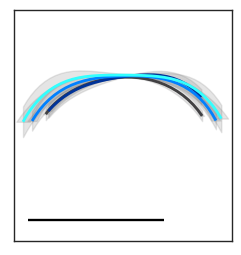

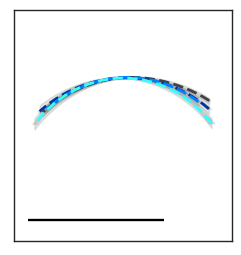

In [75]:

for region in ['acrossDV','alongDV']:
    fig, ax = plt.subplots(figsize = (3,3))
    
    for devstage in ['wL3','0hAPF','2hAPF','4hAPF']:
    
        if region == 'alongDV': 
                style = '--' 
        else:
            style = '-'

        toplot = df_mean_all_trunkated.loc[(df_mean_all_trunkated['devstage']==devstage)&(df_mean_all_trunkated['region']==region)]
        ax.plot(toplot['x_mean'],toplot['y_mean'], color = colors[devstage], linestyle = style,lw = 2)
        ax.fill_between(toplot['x_mean'],y1 = toplot['y_mean']-toplot['y_std'],y2 = toplot['y_mean']+toplot['y_std'], color = 'grey', alpha = 0.2)
        ax.fill_betweenx(y = toplot['y_mean'],x1 = toplot['x_mean']-toplot['x_std'],x2 = toplot['x_mean']+toplot['x_std'], color = 'grey', alpha = 0.2)

        # ax.set_xlim(-100,100)
        # ax.set_ylim(-125,75)
        # ax.set_yticks([])
        # ax.set_xticks([])
        # ax.spines['top'].set_visible(True)
        # ax.spines['right'].set_visible(True)
        # #adding scale bar
        # ax.plot([-100*7/8, -100*7/8+100],[-125*7/8,-125*7/8], lw = 2, color = 'black')     
        ax.set_xlim(-80,80)
        ax.set_ylim(-120,50)
        ax.set_yticks([])
        ax.set_xticks([])
        ax.spines['top'].set_visible(True)
        ax.spines['right'].set_visible(True)
        #adding scale bar
        ax.plot([-80*7/8, -80*7/8+100],[-120*7/8,-120*7/8], lw = 1.5, color = 'black')       
        ax.set_aspect('equal')
    plt.savefig(dataout + genotype + '_' + region +  '_shapeOverlay_eversion_trunkated.pdf', dpi = 600, bbox_inches = 'tight')

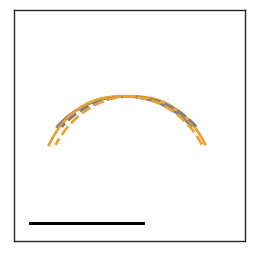

In [122]:
fig, ax = plt.subplots(figsize = (3,3))
for region in ['acrossDV','alongDV']:
    
    for devstage in ['wL3','4hAPF']:
    
        if region == 'alongDV': 
                style = '--' 
        else:
            style = '-'
        if devstage  == 'wL3':
            c = 'initial'
        elif devstage == '4hAPF':
            c = 'final'

        toplot = MyoVI_Results.loc[(MyoVI_Results['devstage']==devstage)&(MyoVI_Results['region']==region)]
        ax.plot(toplot['x'],toplot['y'], color = colors[c], linestyle = style,lw = 2)

        ax.set_xlim(-100,100)
        ax.set_ylim(-125,75)
        ax.set_yticks([])
        ax.set_xticks([])
        ax.spines['top'].set_visible(True)
        ax.spines['right'].set_visible(True)
        ax.plot([-100*7/8, -100*7/8+100],[-125*7/8,-125*7/8], lw = 2, color = 'black')  
        ax.set_aspect('equal')

plt.savefig(dataout + genotype + '_Model_shapeOverlay_wL3_0hAPF.pdf', dpi = 600, bbox_inches = 'tight')

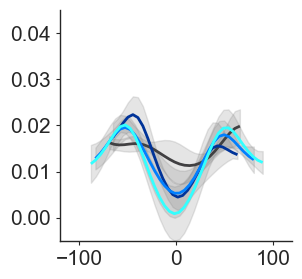

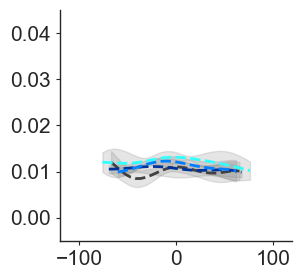

In [120]:

    
for region in ['acrossDV','alongDV']:
    fig, ax = plt.subplots(figsize = (3,3))
    for devstage in ['wL3','0hAPF','2hAPF','4hAPF']:
   
        if region == 'alongDV': 
                style = '--' 
        else:
            style = '-'
        # if devstage  == 'wL3':
        #     c = 'initial'
        # elif devstage == '4hAPF':
        #     c = 'final'

        c = 'final'
        # toplot = ModelAllBehaviours.loc[( ModelAllBehaviours['devstage']==devstage)&( ModelAllBehaviours['region']==region)]
        # ax.plot(toplot['arclength'],toplot['curvature'], color = colors[c], linestyle = style,lw = 2)

        toplot = df_mean_all_trunkated.loc[(df_mean_all_trunkated['devstage']==devstage)&(df_mean_all_trunkated['region']==region)]
        ax.plot(toplot['arclength'],toplot['curvature_mean'], color = colors[devstage], linestyle = style,lw = 2)
        ax.fill_between(toplot['arclength'],y1 = toplot['curvature_mean']-toplot['curvature_std'],y2 = toplot['curvature_mean']+toplot['curvature_std'], color = 'grey', alpha = 0.2)
        

        ax.set_xlim(-120,120)
        ax.set_ylim(-0.005,0.045)


    plt.savefig(dataout + genotype +  '_Data_curvatureOverlay_' + region + '.pdf', dpi = 600, bbox_inches = 'tight')

In [50]:
#### This is the import from 5 simulations
filepath = '/Users/fuhrmann/workspace/WingDiscEversion_theory/Simulations/different_conditions/MyoVI_mutant_simulation/analysis/'
file = filepath + 'crosssections_interpolated_mean.csv'
Model_Results = pd.read_csv(file)

Model_Results.loc[Model_Results['crosssection']=='Across_DV', 'region'] = 'acrossDV'
Model_Results.loc[Model_Results['crosssection']=='Along_DV', 'region'] = 'alongDV'
Model_Results = Model_Results.loc[Model_Results['thickness'] == 0.10]

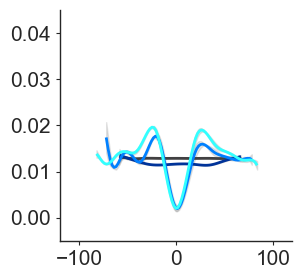

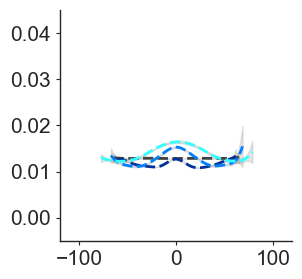

In [51]:
for region in ['acrossDV','alongDV']:
    fig, ax = plt.subplots(figsize = (3,3))
    for i in range (0,4):
        devstage = ['wL3','0hAPF','2hAPF','4hAPF'][i]
        
        if region == 'alongDV': 
                style = '--' 
        else:
            style = '-'  

    
        toplot = Model_Results.loc[(Model_Results['devstage']==devstage)&(Model_Results['region']==region)]
        
        ax.fill_between(toplot['arclength'],y1 = toplot['curvature']-toplot['curvature_sd'],y2 = toplot['curvature']+toplot['curvature_sd'], color = 'grey', alpha = 0.2)

        ax.plot(toplot['arclength'],toplot['curvature'], color = colors[devstage], linestyle = style,lw = 2)

        ax.set_xlim(-120,120)
        ax.set_ylim(-0.005,0.045)


#         ax.plot([-100*7/8, -100*7/8+100],[-125*7/8,-125*7/8], lw = 2, color = 'black')  
#         ax.set_aspect('equal')
    plt.savefig(dataout + 'Model_allMyoVI_curvatureOverlay' + region + '.pdf', dpi = 600, bbox_inches = 'tight')

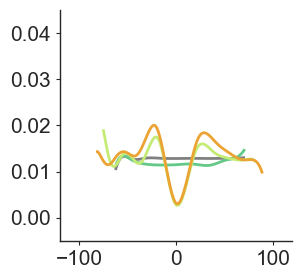

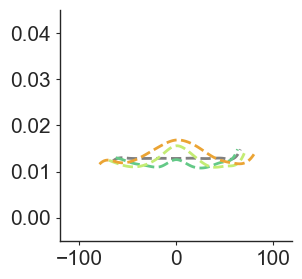

In [123]:

for region in ['acrossDV','alongDV']:
    fig, ax = plt.subplots(figsize = (3,3))
    for i in range (0,4):
        devstage = ['wL3','0hAPF','2hAPF','4hAPF'][i]
        c = ['gray','#64c987','#c4ec74','#EBA434'][i]
        
        if region == 'alongDV': 
                style = '--' 
        else:
            style = '-'
        # if devstage  == 'wL3':
        #     c = 'initial'
        # elif devstage == '4hAPF':
        #     c = 'final'

        toplot = MyoVI_Results.loc[(MyoVI_Results['devstage']==devstage)&(MyoVI_Results['region']==region)]
        ax.plot(toplot['arclength'],toplot['curvature'], color = c, linestyle = style,lw = 2)

        ax.set_xlim(-120,120)
        ax.set_ylim(-0.005,0.045)


#         ax.plot([-100*7/8, -100*7/8+100],[-125*7/8,-125*7/8], lw = 2, color = 'black')  
#         ax.set_aspect('equal')

    plt.savefig(dataout + genotype + '_Model_curvatureOverlay' + region + '.pdf', dpi = 600, bbox_inches = 'tight')

In [13]:

# rough

df = pd.DataFrame({'a':[1,2,3],
                   'b':[[0,1], [2,3], [3,4]]
                   })

df

,a,b
0,1,"[0, 1]"
1,2,"[2, 3]"
2,3,"[3, 4]"


In [16]:

df.at[0,'b'] = [10, 20]

In [17]:
df

,a,b
0,1,"[10, 20]"
1,2,"[2, 3]"
2,3,"[3, 4]"


In [30]:
stages_df =pd.read_pickle('/Users/krishna/PhD/WingDiscEversion_theory/Experiments/analysis/fit_lambda_files/fit_lambdas_df_ecadGFPnbG4.pkl') 
stages_df_myo = pd.read_pickle('/Users/krishna/PhD/WingDiscEversion_theory/Experiments/analysis/fit_lambda_files/fit_lambdas_df_ecadGFPnbG4myoVI.pkl')
stages_df_myo.head(3)



,stage,stage_name,prop,value,stage_init,stage_final,roi
0,0,wL3 to 0hAPF,lambda_isotropic_coeffs,"[0.05502722713633643, 0.9641182387498068]",wL3,0hAPF,outDV
1,1,wL3 to 2hAPF,lambda_isotropic_coeffs,"[-0.01549527250622859, 1.1888042107972443]",wL3,2hAPF,outDV
2,2,wL3 to 4hAPF,lambda_isotropic_coeffs,"[-0.17376990926495064, 1.3817252468656032]",wL3,4hAPF,outDV


In [28]:
def mix_and_match(stages_df, stages_df_myo, stage, region):

    prefix = '' if region == "outDV" else 'inDV_'

    ind = stages_df.query(f"stage == @stage and prop == '" + prefix + "lambda_rearrangement_coeffs'").index.values[0]
    ind_myo = stages_df_myo.query(f"stage == @stage and prop == '" + prefix + "lambda_rearrangement_coeffs'").index.values[0]
    stages_df.at[ind, 'value'] = stages_df_myo.at[ind_myo, "value"]
    ## multiply elongation and rearrangement
    ind_Q = stages_df.query(f"stage == @stage and prop == '" + prefix + "lambda_Q_coeffs'").index.values[0]
    coeffs_Q = stages_df.at[ind_Q, "value"]; coeffs_R = stages_df.at[ind, 'value']
    coeffs_anisotropic = [coeffs_Q[0]*coeffs_R[0],
                          coeffs_Q[0]*coeffs_R[1] + coeffs_Q[1]*coeffs_R[0],
                          coeffs_Q[1]*coeffs_R[1]
                          ] #assuming it was linear for Q and R
    ind_anisotropic = stages_df.query(f"stage == @stage and prop == '" + prefix + "lambda_anisotropic_coeffs'").index.values[0]
    stages_df.at[ind_anisotropic, "value"] = coeffs_anisotropic

    return(stages_df)

for stage in stages:
    # OutDV
    stages_df = mix_and_match(stages_df, stages_df_myo, stage, "outDV")
    stages_df = mix_and_match(stages_df, stages_df_myo, stage, "inDV")
    break

In [31]:
stages_df[stages_df["stage"] == 0]

,stage,stage_name,prop,value,stage_init,stage_final,roi
0,0,wL3 to 0hAPF,lambda_isotropic_coeffs,"[-0.1466314118835658, 1.2061157068172164]",wL3,0hAPF,outDV
3,0,wL3 to 0hAPF,inDV_lambda_isotropic_coeffs,"[-0.13199526622899696, 1.1932208575078265]",wL3,0hAPF,DV
6,0,wL3 to 0hAPF,lambda_Q_coeffs,"[-0.07368565578484423, 0.9991787571301044]",wL3,0hAPF,outDV
9,0,wL3 to 0hAPF,inDV_lambda_Q_coeffs,"[-0.03702552876533315, 1.0678595191033167]",wL3,0hAPF,DV
12,0,wL3 to 0hAPF,lambda_rearrangement_coeffs,"[0.060268528915225675, 1.036885332054766]",wL3,0hAPF,outDV
15,0,wL3 to 0hAPF,inDV_lambda_rearrangement_coeffs,"[-0.2084367016395006, 1.1347574081502612]",wL3,0hAPF,DV
18,0,wL3 to 0hAPF,lambda_anisotropic_coeffs,"[-0.06585952416862885, 1.0521108376228532]",wL3,0hAPF,outDV
21,0,wL3 to 0hAPF,inDV_lambda_anisotropic_coeffs,"[-0.2721616105594985, 1.2270672355144654]",wL3,0hAPF,DV
24,0,wL3 to 0hAPF,lambda_height_coeffs,"[-0.16367646450584403, 0.3552056970775847, 0.9...",wL3,0hAPF,outDV
27,0,wL3 to 0hAPF,inDV_lambda_height_coeffs,"[0.07385394170781868, 0.04487400959148611, 0.8...",wL3,0hAPF,DV


In [32]:
stages_df_myo[stages_df_myo["stage"] == 0]

,stage,stage_name,prop,value,stage_init,stage_final,roi
0,0,wL3 to 0hAPF,lambda_isotropic_coeffs,"[0.05502722713633643, 0.9641182387498068]",wL3,0hAPF,outDV
3,0,wL3 to 0hAPF,inDV_lambda_isotropic_coeffs,"[-0.05065185527719061, 1.0205026535507626]",wL3,0hAPF,DV
6,0,wL3 to 0hAPF,lambda_Q_coeffs,"[-0.07664857065854086, 1.0156899884094461]",wL3,0hAPF,outDV
9,0,wL3 to 0hAPF,inDV_lambda_Q_coeffs,"[-0.01843729937088558, 1.0815541898233418]",wL3,0hAPF,DV
12,0,wL3 to 0hAPF,lambda_rearrangement_coeffs,"[-0.005658863407464811, 1.0249624116623146]",wL3,0hAPF,outDV
15,0,wL3 to 0hAPF,inDV_lambda_rearrangement_coeffs,"[-0.05472523636875911, 0.9086772245647096]",wL3,0hAPF,DV
18,0,wL3 to 0hAPF,lambda_anisotropic_coeffs,"[-0.053045614014526433, 1.0351126110826598]",wL3,0hAPF,outDV
21,0,wL3 to 0hAPF,inDV_lambda_anisotropic_coeffs,"[-0.0494559985079422, 0.9626946389202943]",wL3,0hAPF,DV
24,0,wL3 to 0hAPF,lambda_height_coeffs,"[-0.055938442391377755, 0.3499143514212316, 0....",wL3,0hAPF,outDV
27,0,wL3 to 0hAPF,inDV_lambda_height_coeffs,"[0.23744525886060647, -0.21820841783314002, 0....",wL3,0hAPF,DV


In [29]:
stages_df[stages_df["stage"] == 0]

,stage,stage_name,prop,value,stage_init,stage_final,roi
0,0,wL3 to 0hAPF,lambda_isotropic_coeffs,"[-0.1466314118835658, 1.2061157068172164]",wL3,0hAPF,outDV
3,0,wL3 to 0hAPF,inDV_lambda_isotropic_coeffs,"[-0.13199526622899696, 1.1932208575078265]",wL3,0hAPF,DV
6,0,wL3 to 0hAPF,lambda_Q_coeffs,"[-0.07368565578484423, 0.9991787571301044]",wL3,0hAPF,outDV
9,0,wL3 to 0hAPF,inDV_lambda_Q_coeffs,"[-0.03702552876533315, 1.0678595191033167]",wL3,0hAPF,DV
12,0,wL3 to 0hAPF,lambda_rearrangement_coeffs,"[-0.005658863407464811, 1.0249624116623146]",wL3,0hAPF,outDV
15,0,wL3 to 0hAPF,inDV_lambda_rearrangement_coeffs,"[-0.05472523636875911, 0.9086772245647096]",wL3,0hAPF,DV
18,0,wL3 to 0hAPF,lambda_anisotropic_coeffs,"[0.0004169770611759028, -0.08117924356439285, ...",wL3,0hAPF,outDV
21,0,wL3 to 0hAPF,inDV_lambda_anisotropic_coeffs,"[0.0020262308133611466, -0.09208311930808219, ...",wL3,0hAPF,DV
24,0,wL3 to 0hAPF,lambda_height_coeffs,"[-0.16367646450584403, 0.3552056970775847, 0.9...",wL3,0hAPF,outDV
27,0,wL3 to 0hAPF,inDV_lambda_height_coeffs,"[0.07385394170781868, 0.04487400959148611, 0.8...",wL3,0hAPF,DV
